In [23]:
"""
Copyright 2021 Huawei Technologies Co., Ltd

CREATED:  2020-6-04 20:12:13
MODIFIED: 2021-11-01 01:48:45
"""

# -*- coding:utf-8 -*-
import os
import cv2
import numpy as np

from acl_model import Model
from PIL import Image, ImageDraw

In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
result_folder = 'results/'
if not os.path.isdir(result_folder):
    os.mkdir(result_folder)

In [34]:
device_id = 0
model_path = "model/craft.om"

In [35]:
model = Model(device_id, model_path)

[ACL] init resource stage:
[ACL] init resource stage success
[Model] class Model init resource stage:
[Model] create model output dataset:
[Model] create model output dataset success
model input size 1
input  0
model input dims ({'name': 'input.1', 'dimCount': 4, 'dims': [1, 3, 864, 1280]}, 0)
model input datatype 0
model output size 1
output  0
model output dims ({'name': 'Transpose_136:0', 'dimCount': 4, 'dims': [1, 432, 640, 2]}, 0)
model output datatype 0
[Model] class Model init resource stage success
[Model] class Model release source success
[ACL] class Sample release source success


In [36]:
img_path = "data/test.jpg"
threshold_dict = {"text_threshold":0.7, "link_threshold":0.4, "low_text":0.4}

In [37]:
res_img, bboxes, polys, score_text = model.run(img_path, threshold_dict, result_folder)

[PreProc] image_np_expanded shape: (1, 3, 864, 1280)
[ACL] img_host_ptr, img_buf_size:  93883236950592 13271040
[ACL] img_dev_ptr, img_buf_size:  18143049154560 13271040
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Result] infer / postproc time : 0.080 / 0.158


In [38]:
# save score text
filename, file_ext = os.path.splitext(os.path.basename(img_path))
mask_file = result_folder + "/res_" + filename + '_mask.jpg'
cv2.imwrite(mask_file, score_text)

True

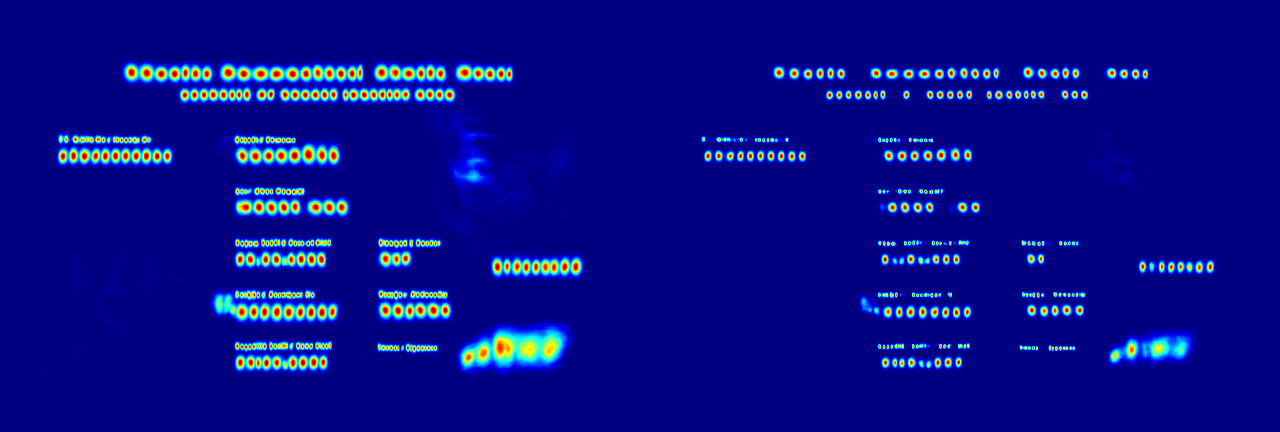

In [39]:
# show score text
score_img = cv2.cvtColor(score_text, cv2.COLOR_BGR2RGB)
score_img_plw = Image.fromarray(score_img)
score_img_plw

In [40]:
#  save result file
res_file = result_folder + "res_" + filename + '.txt'
res_img_file = result_folder + "res_" + filename + '.jpg'

res_img = cv2.imread(img_path)

with open(res_file, 'w') as f:
    for i, poly in enumerate(polys):
        poly = np.array(poly).astype(np.int32).reshape((-1))
        strResult = ','.join([str(p) for p in poly]) + '\r\n'
        f.write(strResult)
        
        poly = poly.reshape(-1, 2)
        cv2.polylines(res_img, [poly.reshape((-1, 1, 2))], True, color=(0, 0, 255), thickness=2)

cv2.imwrite(res_img_file, res_img)

True

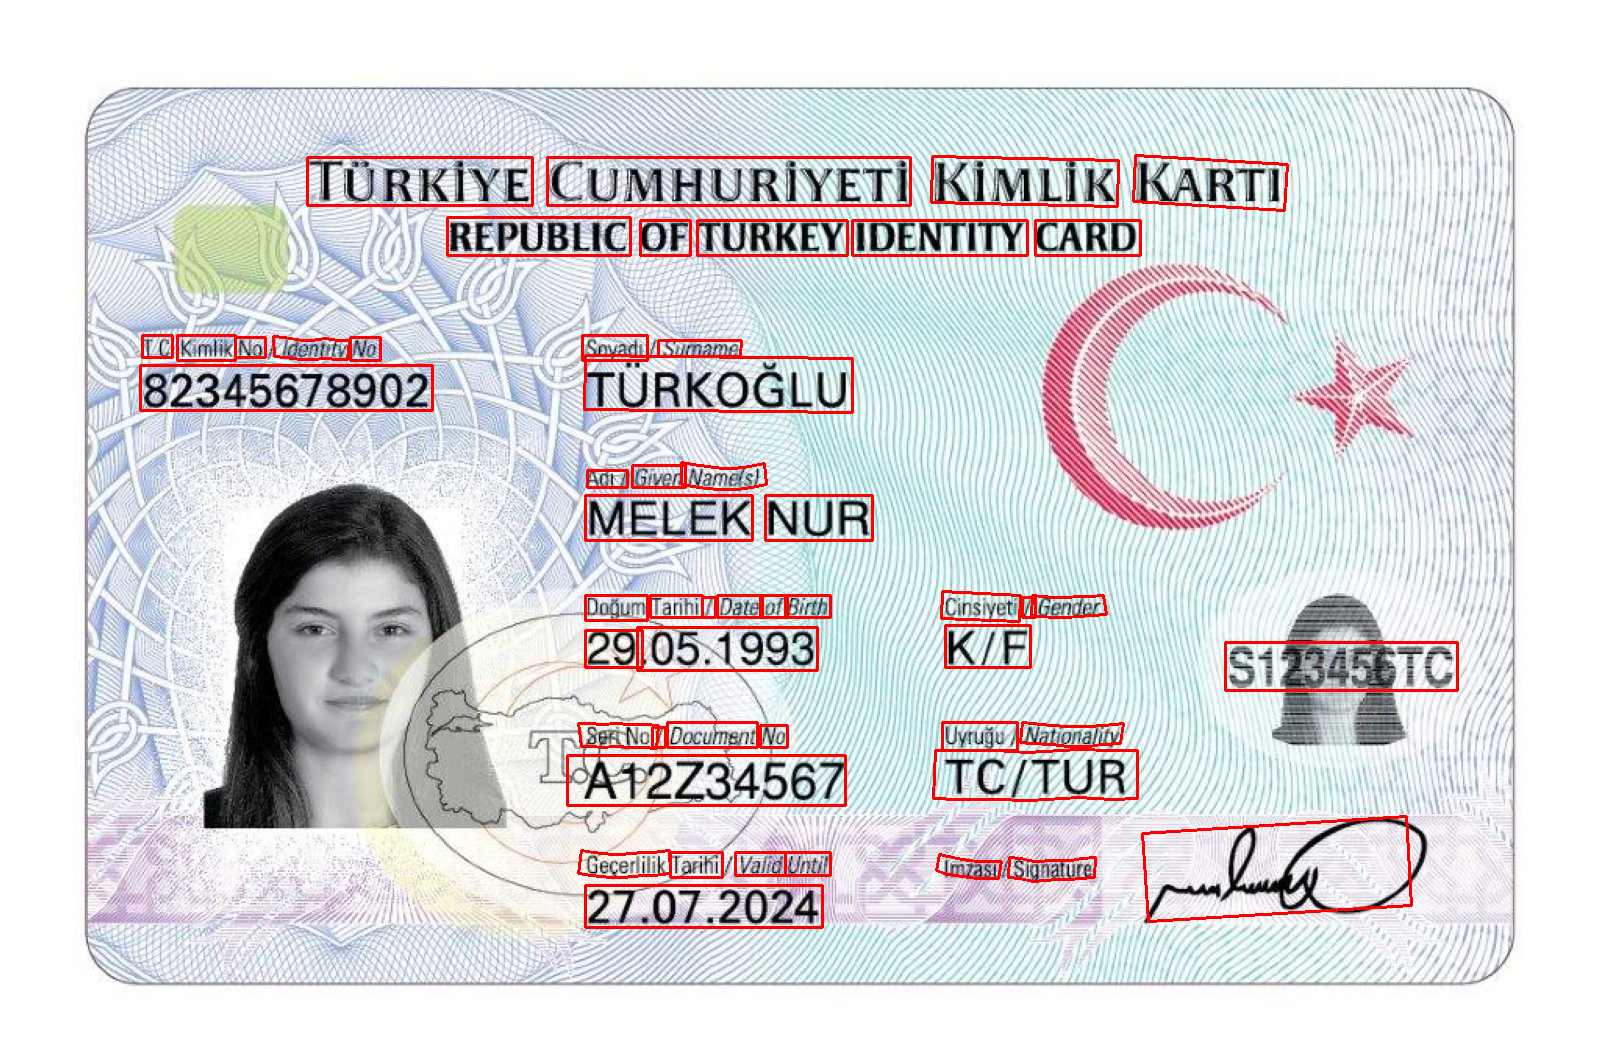

In [41]:
# show score text
res_img = cv2.cvtColor(res_img, cv2.COLOR_BGR2RGB)
res_img_plw = Image.fromarray(res_img)
res_img_plw